In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [87]:
# Generate sample data with one variable 
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2.5 * X.ravel() + 5 + np.random.normal(0, 2, 100)  # y = 2.5X + 5 + noise

df = pd.DataFrame(X, columns=['X'])
df['y'] = y
df.head()

,X,y
0,0.00000,5.993428
1,0.10101,4.975997
2,0.20202,6.800428
3,0.30303,8.803635
4,0.40404,5.541794


In [89]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split (
    X, y,
    test_size = 0.2,
    random_state = 42
)


In [91]:
# Standardize features (import for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Ordinary Linear Regression (No Regularization)

In [94]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [119]:
coefficient = model.coef_[0]
intercept = model.intercept_
r2_score_train = model.score(X_train_scaled, y_train)
r2_score_test = model.score(X_test_scaled, y_test)

print(f"Cofficient: {coefficient:.4f}\n")
print(f"Intercept:  {intercept:.4f}\n")
print(f"Training R² score: {r2_score_train:.4f}\n")
print(f"Testing R² score:  {r2_score_test:.4f}\n")  


Cofficient: 7.3606

Intercept:  17.5791

Training R² score: 0.9401

Testing R² score:  0.9553



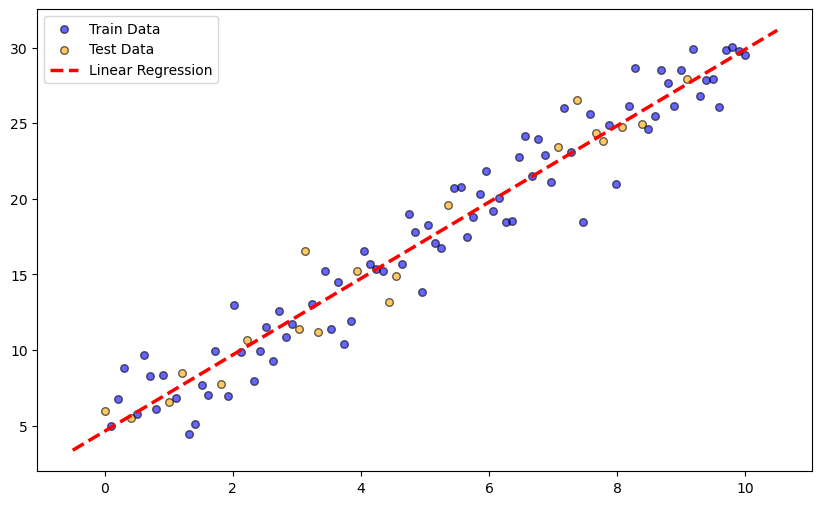

In [130]:
# Visualize with the smooth line 
# 50-100 points: Sufficient for linear models
X_plot_original = np.linspace(X.min() - 0.5, X.max() + 0.5, 100).reshape(-1, 1)

# Transform the plot using the same scaler 
X_plot_scaled = scaler.transform(X_plot_original)

# Get predictions --> model expects scaled data
y_plot = model.predict(X_plot_scaled)


plt.figure(figsize =(10,6))
plt.scatter(X_train, y_train, alpha = 0.6, s = 30, color = "blue", label = "Train Data", edgecolors = "black")
plt.scatter(X_test, y_test, alpha = 0.6, s = 30, color = "orange", label = "Test Data", edgecolors = "black")
plt.plot(X_plot_original, y_plot, "r--", linewidth = 2.5, label = "Linear Regression")
plt.legend()
plt.show()



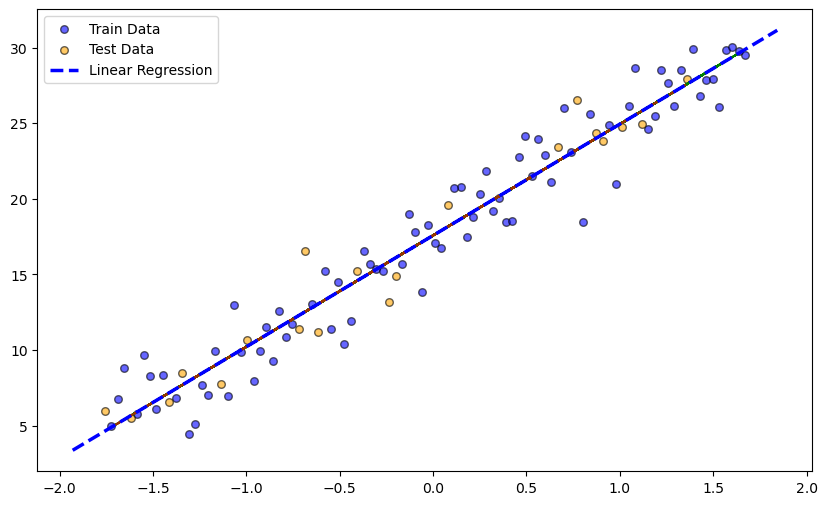

In [128]:
plt.figure(figsize =(10,6))
plt.scatter(X_train_scaled, y_train, alpha = 0.6, s = 30, color = "blue", label = "Train Data", edgecolors = "black")
plt.scatter(X_test_scaled, y_test, alpha = 0.6, s = 30, color = "orange", label = "Test Data", edgecolors = "black")
plt.plot(X_train_scaled, y_pred_scaled, "g--")
plt.plot(X_test_scaled, model.predict(X_test_scaled), "r--", alpha = 0.6)
plt.plot(X_plot_scaled, y_plot, "b--", linewidth = 2.5, label = "Linear Regression")
plt.legend()


- -------------------------------------------------------------------------------------------------------------------------------------------

### Understanding the StandardScaler () function

In [ ]:
# What model sees (Scaled Space)

X_plot_scaled = [-1.34, -0.89, -0.45, 0, 0.45, 0.89, 1.34]
y_plot        = [200,    300,    350,  400, 450,  500,  600]

# Model's equation in scaled space:
# y = 7.36 * X_scaled + 17.58

In [ ]:
# What we plot (Original Space)

X_plot_original = [1000, 1500, 2000, 2500, 3000]
y_plot          = [200,  300,  400,  500,  600]

# Same y values, but X is in original units!

#### The scaler's `transform` does this:

In [ ]:
# StandardScaler formula:
X_scaled = (X_original - mean) / std

# Example with our data:
# mean = 2000, std = 745.36
X_original = 1000
X_scaled = (1000 - 2000) / 745.36 = -1.34

X_original = 3000  
X_scaled = (3000 - 2000) / 745.36 = 1.34